In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import copy
import bisect
from scipy import optimize as opt
from sklearn.linear_model import LinearRegression
from math import *
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, ConfusionMatrixDisplay, confusion_matrix

In [135]:
#df = pd.read_csv("data_final.csv")
df = pd.read_csv("clean_data_2.csv")
df = df.drop(
        "Unnamed: 0",
    axis=1
)
df

,how_old_are_you,adjusted_annual_salary,annual_salary,overall_years_of_professional_experience,years_of_experience_in_field,highest_level_of_education_completed,gender,industry,harmonized_salary
0,25-34,0.885018,55000.0,5-7 years,5-7 years,Master's degree,Woman,Education,55000.0
1,25-34,1.793468,54600.0,8 - 10 years,5-7 years,College degree,Non-binary,Technology & Science,68796.0
2,25-34,0.547102,34000.0,2 - 4 years,2 - 4 years,College degree,Woman,Banking & Insurance,34000.0
3,25-34,0.997657,62000.0,8 - 10 years,5-7 years,College degree,Woman,Non profit Organization,62000.0
4,25-34,0.965475,60000.0,8 - 10 years,5-7 years,College degree,Woman,Banking & Insurance,60000.0
...,...,...,...,...,...,...,...,...,...
22883,25-34,1.367756,85000.0,5-7 years,5-7 years,College degree,Woman,Unidentified,85000.0
22884,35-44,0.643650,40000.0,11 - 20 years,2 - 4 years,College degree,Woman,Non profit Organization,40000.0
22885,25-34,2.381504,148000.0,11 - 20 years,11 - 20 years,Master's degree,Woman,Technology & Science,148000.0
22886,25-34,1.045931,65000.0,2 - 4 years,2 - 4 years,College degree,Woman,Advertising,65000.0


In [136]:
df.describe()

,adjusted_annual_salary,annual_salary,harmonized_salary
count,22888.000000,22888.000000,22888.000000
mean,1.427152,82259.401870,81548.195775
std,1.529510,36869.915141,36441.294843
min,0.000000,10000.000000,12084.000000
25%,0.933292,54499.000000,54000.000000
50%,1.284867,75000.000000,74000.000000
75%,1.757164,104000.000000,102700.000000
max,130.616510,188000.000000,233100.000000


In [46]:
#df.harmonized_salary.quantile([0.33,0.66])

In [137]:
df['real_label']= 0
#mask_label = df['harmonized_salary'] > 75000
mask_label = df['adjusted_annual_salary'] > 1
df.loc[mask_label, 'real_label'] = 1

In [138]:
df

,how_old_are_you,adjusted_annual_salary,annual_salary,overall_years_of_professional_experience,years_of_experience_in_field,highest_level_of_education_completed,gender,industry,harmonized_salary,real_label
0,25-34,0.885018,55000.0,5-7 years,5-7 years,Master's degree,Woman,Education,55000.0,0
1,25-34,1.793468,54600.0,8 - 10 years,5-7 years,College degree,Non-binary,Technology & Science,68796.0,1
2,25-34,0.547102,34000.0,2 - 4 years,2 - 4 years,College degree,Woman,Banking & Insurance,34000.0,0
3,25-34,0.997657,62000.0,8 - 10 years,5-7 years,College degree,Woman,Non profit Organization,62000.0,0
4,25-34,0.965475,60000.0,8 - 10 years,5-7 years,College degree,Woman,Banking & Insurance,60000.0,0
...,...,...,...,...,...,...,...,...,...,...
22883,25-34,1.367756,85000.0,5-7 years,5-7 years,College degree,Woman,Unidentified,85000.0,1
22884,35-44,0.643650,40000.0,11 - 20 years,2 - 4 years,College degree,Woman,Non profit Organization,40000.0,0
22885,25-34,2.381504,148000.0,11 - 20 years,11 - 20 years,Master's degree,Woman,Technology & Science,148000.0,1
22886,25-34,1.045931,65000.0,2 - 4 years,2 - 4 years,College degree,Woman,Advertising,65000.0,1


In [139]:
mask_18 = df['how_old_are_you'] == 'under 18'
mask_21 = df['how_old_are_you'] == '18-24'
mask_30 = df['how_old_are_you'] == '25-34'
mask_40 = df['how_old_are_you'] == '35-44'
mask_50 = df['how_old_are_you'] == '45-54'
mask_60 = df['how_old_are_you'] == '55-64'
mask_65 = df['how_old_are_you'] == '65 or over'
df.loc[mask_18, 'how_old_are_you'] = 1
df.loc[mask_21, 'how_old_are_you'] = 2
df.loc[mask_30, 'how_old_are_you'] = 3
df.loc[mask_40, 'how_old_are_you'] = 4
df.loc[mask_50, 'how_old_are_you'] = 5
df.loc[mask_60, 'how_old_are_you'] = 6
df.loc[mask_65, 'how_old_are_you'] = 7
df['how_old_are_you'] = pd.to_numeric(df['how_old_are_you'], errors='coerce')

mask_1 = df['overall_years_of_professional_experience'] == '1 year or less'
mask_3 = df['overall_years_of_professional_experience'] == '2 - 4 years'
mask_6 = df['overall_years_of_professional_experience'] == '5-7 years'
mask_9 = df['overall_years_of_professional_experience'] == '8 - 10 years'
mask_15 = df['overall_years_of_professional_experience'] == '11 - 20 years'
mask_25 = df['overall_years_of_professional_experience'] == '21 - 30 years'
mask_35 = df['overall_years_of_professional_experience'] == '31 - 40 years'
mask_41 = df['overall_years_of_professional_experience'] == '41 years or more'
df.loc[mask_1, 'overall_years_of_professional_experience'] = 1
df.loc[mask_3, 'overall_years_of_professional_experience'] = 2
df.loc[mask_6, 'overall_years_of_professional_experience'] = 3
df.loc[mask_9, 'overall_years_of_professional_experience'] = 4
df.loc[mask_15, 'overall_years_of_professional_experience'] = 5
df.loc[mask_25, 'overall_years_of_professional_experience'] = 6
df.loc[mask_35, 'overall_years_of_professional_experience'] = 7
df.loc[mask_41, 'overall_years_of_professional_experience'] = 8
df['overall_years_of_professional_experience'] = pd.to_numeric(df['overall_years_of_professional_experience'], errors='coerce')

mask_1 = df['years_of_experience_in_field'] == '1 year or less'
mask_3 = df['years_of_experience_in_field'] == '2 - 4 years'
mask_6 = df['years_of_experience_in_field'] == '5-7 years'
mask_9 = df['years_of_experience_in_field'] == '8 - 10 years'
mask_15 = df['years_of_experience_in_field'] == '11 - 20 years'
mask_25 = df['years_of_experience_in_field'] == '21 - 30 years'
mask_35 = df['years_of_experience_in_field'] == '31 - 40 years'
mask_41 = df['years_of_experience_in_field'] == '41 years or more'
df.loc[mask_1, 'years_of_experience_in_field'] = 1
df.loc[mask_3, 'years_of_experience_in_field'] = 2
df.loc[mask_6, 'years_of_experience_in_field'] = 3
df.loc[mask_9, 'years_of_experience_in_field'] = 4
df.loc[mask_15, 'years_of_experience_in_field'] = 5
df.loc[mask_25, 'years_of_experience_in_field'] = 6
df.loc[mask_35, 'years_of_experience_in_field'] = 7
df.loc[mask_41, 'years_of_experience_in_field'] = 8
df['years_of_experience_in_field'] = pd.to_numeric(df['years_of_experience_in_field'], errors='coerce')

mask_5 = df['highest_level_of_education_completed'] == 'High School'
mask_10 = df['highest_level_of_education_completed'] == 'Some college'
mask_15 = df['highest_level_of_education_completed'] == 'College degree'
mask_20 = df['highest_level_of_education_completed'] == 'Professional degree (MD, JD, etc.)'
mask_25 = df['highest_level_of_education_completed'] == "Master's degree"
mask_30 = df['highest_level_of_education_completed'] == 'PhD'
mask_nan = df['highest_level_of_education_completed'] == 'Unknown'
df.loc[mask_5, 'highest_level_of_education_completed'] = 1
df.loc[mask_10, 'highest_level_of_education_completed'] = 2
df.loc[mask_15, 'highest_level_of_education_completed'] = 3
df.loc[mask_20, 'highest_level_of_education_completed'] = 4
df.loc[mask_25, 'highest_level_of_education_completed'] = 5
df.loc[mask_30, 'highest_level_of_education_completed'] = 6
df.loc[mask_nan, 'highest_level_of_education_completed'] =  float("NaN")
df['highest_level_of_education_completed'] = pd.to_numeric(df['highest_level_of_education_completed'], errors='coerce')

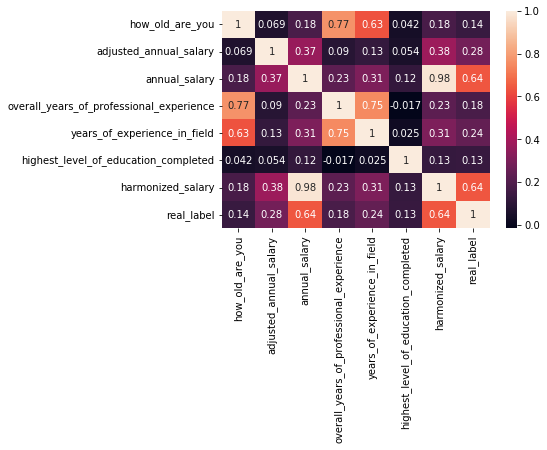

In [140]:
corr = df.corr()
sns.heatmap(corr, annot=True)

In [144]:
def float_format (value) :
    formatted_string = "{:.6f}".format(value)
    float_value = float(formatted_string)
    return float_value

In [145]:
def construct_precentage_cm (cm, X_test) :
    TN = float("{:.4f}".format(cm[0][0]/np.shape(X_test)[0]*100))
    TP = float("{:.4f}".format(cm[1][1]/np.shape(X_test)[0]*100))
    FP = float("{:.4f}".format(cm[0][1]/np.shape(X_test)[0]*100))
    FN = float("{:.4f}".format(cm[1][0]/np.shape(X_test)[0]*100))
    
    percentage_list = [[TN, FP], [FN, TP]]
    
    return np.array(percentage_list)

In [147]:
train_features, test_features, train_labels, test_labels = train_test_split(
    df[["industry", 
        "overall_years_of_professional_experience",
        "years_of_experience_in_field", 
        "highest_level_of_education_completed",
        "gender", 
        "how_old_are_you"
       ]],
    df["real_label"],
    test_size = 0.25,
    random_state = 1234
)

dummy_train_features = pd.get_dummies(train_features)
dummy_test_features = pd.get_dummies(test_features)

In [148]:
X_test = test_features

## Random forest

Accuracy : 73.89 %


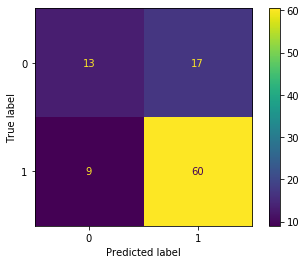

In [149]:
rf = RandomForestClassifier(n_estimators=100, criterion='gini')
rf.fit(dummy_train_features, train_labels)
predictions = rf.predict(dummy_test_features)
print('Accuracy :', round(accuracy_score(test_labels, predictions),4)*100,'%')

rf_cm = confusion_matrix(test_labels, predictions, labels=rf.classes_)
percentage_cm = construct_precentage_cm (rf_cm, X_test)
disp = ConfusionMatrixDisplay(confusion_matrix=percentage_cm, display_labels=rf.classes_)
disp.plot()

## KNN

Accuracy : 74.82 %


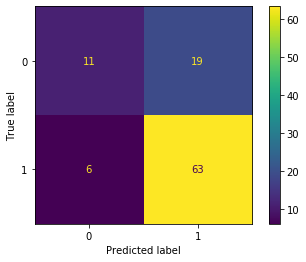

In [152]:
knn = KNeighborsClassifier(70) #floor(sqrt(np.shape(df)[0])
knn.fit(dummy_train_features, train_labels)
predictions = knn.predict(dummy_test_features)
print('Accuracy :', round(accuracy_score(test_labels, predictions),4)*100,'%')

knn_cm = confusion_matrix(test_labels, predictions, labels=knn.classes_)
percentage_cm = construct_precentage_cm (knn_cm, X_test)
disp = ConfusionMatrixDisplay(confusion_matrix=percentage_cm, display_labels=knn.classes_)
disp.plot()

In [153]:
# KNN with scaled data
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

dummy_train_features = pd.get_dummies(train_features)
dummy_test_features = pd.get_dummies(test_features)

y_train = train_labels
X_train = dummy_train_features
y_test = test_labels
X_test = dummy_test_features



pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(50))
pipe.fit(X_train, y_train)  # apply scaling on training data

pipe.score(X_test, y_test)


0.7390772457182804

## Logistic regression

Accuracy : 74.71 %


C:\Users\assil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


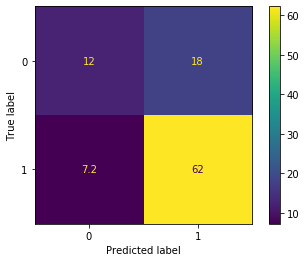

In [154]:
lr = LogisticRegression()
lr.fit(dummy_train_features, train_labels)
predictions = lr.predict(dummy_test_features)
print('Accuracy :', round(accuracy_score(test_labels, predictions),4)*100,'%')

lr_cm = confusion_matrix(test_labels, predictions, labels=lr.classes_)
percentage_cm = construct_precentage_cm (lr_cm, X_test)
disp = ConfusionMatrixDisplay(confusion_matrix=percentage_cm, display_labels=lr.classes_)
disp.plot()

## Fully corrective binning

In [155]:
def MSE(theta, Z, Y, intercept) :
    return np.square(np.subtract(Y,np.dot(Z, theta)+intercept)).mean()

In [156]:
def construct_Z(X, selected_bins) :
    
    N = np.shape(X)[0]
    p = np.shape(X)[1]
    
    size = 0
    for j in range(p):
        size = size + len(selected_bins[j]) - 1
            
    Z = np.zeros((N, size))
    
    for i in range(N):
        ind = 0
        for j in range(p):
            for l_prime in range(len(selected_bins[j])-1):
                
                l = selected_bins[j][l_prime]
                u = selected_bins[j][l_prime+1]
                
                if l < X[i,j] and X[i,j] < u :
                    Z[i,ind] = 1
                    
                ind = ind + 1
    
    return Z

In [157]:
# The Fully Corrective Binning
# input : 
#  --> (X, Y) les entrées/sorties d'entrainement
#  --> T le nombre d'itérations
#  --> K le nombre de bacs ("bins") (<T)
#  --> R la fonction de coût à minimiser (de paramètre theta, Z et Y)
#  --> le nombre de bins généré aléatoirement à tester
# output : [theta, selected_features]
#  --> theta, le vecteur de dimensions de qui correspond au modèle de score (tel que Z*theta = Y)
#  --> selected_bins les valeurs des bacs sélectionnées


#créer un objet reg lin
modeleReg=LinearRegression()


def FCB(X, Y, T, K):
    
    if (K>T):
        print("Erreur : K>T")
        return 
    
    mse_list = []
    
    N = np.shape(X)[0]
    p = np.shape(X)[1]
    
    if (K<p):
        print("Erreur : K>p")
        return 
    
    # X_{i,j} \in  [-Omega ; Omega] 
    Omega = np.zeros((p,2), dtype=float) 
    for i in range(p):
        Omega[i] = (np.min(X[:,i]), np.max(X[:,i]))
    
    selected_bins = []
    for i in range(p):
        selected_bins.append([])
        selected_bins[i].append(Omega[i][0])
        selected_bins[i].append(Omega[i][1])
    
    Z = construct_Z(X, selected_bins)
    
    reg = modeleReg.fit(Z,Y)
    theta = reg.coef_
    
    mse_list.append(((Y-modeleReg.predict(Z))**2).sum()/len(Y))
    
    # T itérations
    for t in range(T):

        mini = 10e12
        argmin = (0, 0, 0, 0) # (j, l, u, r)
        for j in range(p):
            size = len(selected_bins[j])
            for l_prime in range(size-1):
                
                l = selected_bins[j][l_prime]
                u = selected_bins[j][l_prime+1]
                    
                r = (l+u)/2
                
                try_bins = copy.deepcopy(selected_bins)
                bisect.insort(try_bins[j], r)
                Z = construct_Z(X, try_bins)
                
                reg = modeleReg.fit(Z,Y)
                mse = ((Y-modeleReg.predict(Z))**2).sum()/len(Y)
                theta = reg.coef_
                
                if mse < mini :
                    mini = mse
                    argmin = (j, l, u, r)
        
        
        bisect.insort(selected_bins[argmin[0]], argmin[3])
        
        Z = construct_Z(X, selected_bins)
        
        reg = modeleReg.fit(Z,Y)
        theta = reg.coef_
        
        # K bacs
        if(t > K-p-1):
            
            mini = 10e12
            argmin = (0, 0) # (j, l)
            for j in range(p):
                size = len(selected_bins[j])
                for l_prime in range(size-1):                

                    res = abs(theta[l_prime] - theta[l_prime+1])
                    if res < mini:
                        mini = res
                        argmin = (j, l_prime)       
                        
            del selected_bins[argmin[0]][max(0, argmin[1])]
        
            Z = construct_Z(X, selected_bins)
            
            reg = modeleReg.fit(Z,Y)
            theta = reg.coef_
            
        mse_list.append(((Y-modeleReg.predict(Z))**2).sum()/len(Y))
        
    plt.plot(mse_list)
    if (T> K-p-1):
        plt.axvline(x = K, ymin = 0, ymax  = max(mse_list), color = 'green', alpha = 0.5, linestyle = '--', linewidth = 4)
    
    return [theta, selected_bins, reg.intercept_]

In [192]:
train_features, test_features, train_labels, test_labels = train_test_split(
    df[["years_of_experience_in_field", 
        "overall_years_of_professional_experience", 
        "how_old_are_you", 
        "highest_level_of_education_completed", 
        #"harmonized_salary",
        "adjusted_annual_salary"
       ]],
    df["real_label"],
    test_size = 0.25,
    random_state = 1234
)

In [193]:
# harmonized_salary
Y_train = train_features["adjusted_annual_salary"]
X_train = train_features.loc[:,train_features.columns!="adjusted_annual_salary"]
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()

2.5324365187893947

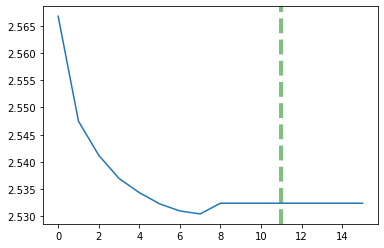

In [194]:
[theta, selected_bins, intercept] = FCB(X_train, Y_train, 15 , 11)
Z_train = construct_Z(X_train, selected_bins)
MSE(theta, Z_train, Y_train, intercept)

In [195]:
selected_bins

[[1.0, 3.625, 4.5, 5.375, 6.25, 8.0],
 [1.0, 8.0],
 [1.0, 7.0],
 [1.0, 2.25, 3.5, 4.75, 6.0]]

In [196]:
theta

array([ 0.2222496 ,  0.4086389 ,  0.54828328,  0.66664362,  0.78437594,
       -0.00675681,  0.1760343 , -0.33770166, -0.14648418,  0.20261128,
       -0.05699424])

In [197]:
# harmonized_salary
X_test = test_features.loc[:,test_features.columns!="adjusted_annual_salary"]
X_test = X_test.to_numpy()

In [198]:
Z_test = construct_Z(X_test, selected_bins)

In [199]:
pred = np.dot(Z_test, theta) + intercept

In [200]:
# harmonized_salary
predicted_data = {'predicted_adjusted_salary': pred, 'real_label':test_labels, 'predicted_label': 0}
predicted_df = pd.DataFrame(data=predicted_data)
mask_pred_label = predicted_df['predicted_adjusted_salary'] > 1
predicted_df.loc[mask_pred_label, 'predicted_label'] = 1

In [201]:
predicted_df

,predicted_adjusted_salary,real_label,predicted_label
8457,1.597916,1,1
10497,1.810947,1,1
4682,1.435210,1,1
13638,1.057603,1,1
9814,1.810947,1,1
...,...,...,...
19005,1.338310,0,1
12481,1.338310,0,1
19946,1.574854,1,1
9429,1.810947,1,1


Accuracy : 69.61 %


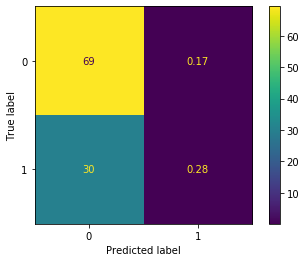

In [234]:
print('Accuracy :', round(accuracy_score(test_labels, predicted_df['predicted_label'].to_numpy()),4)*100,'%')

scoring_cm = confusion_matrix(test_labels, predicted_df['predicted_label'].to_numpy(), 
                              labels=predicted_df['real_label'].unique())

percentage_cm = construct_precentage_cm (scoring_cm, X_test)
disp = ConfusionMatrixDisplay(confusion_matrix=percentage_cm, display_labels=lr.classes_)
disp.plot()

# Regression for classification

## Gradient boosting without monotonicity constraints

In [204]:
# harmonized_salary
train_features, test_features, train_target, test_target = train_test_split(
    df[["industry", 
        "overall_years_of_professional_experience",
        "years_of_experience_in_field", 
        "highest_level_of_education_completed",
        "gender", 
        "how_old_are_you"
       ]],
    df["adjusted_annual_salary"],
    test_size = 0.25,
    random_state = 42
)

In [205]:
dummy_train_features = pd.get_dummies(train_features)
dummy_test_features = pd.get_dummies(test_features)

In [206]:
#pip install lightgbm#
import lightgbm as lgb
basic_model = lgb.LGBMRegressor(min_child_samples=5)
basic_model.fit(dummy_train_features, train_target)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=5, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [207]:
#predicted output from the model from the same input
prediction = basic_model.predict(dummy_test_features)

<Figure size 1200x1200 with 0 Axes>

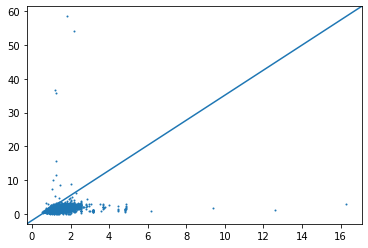

In [208]:
from matplotlib.pyplot import figure
figure(figsize=(15, 15), dpi=80)
fig, ax = plt.subplots()
ax.plot([0,1],[0,1], transform=ax.transAxes)
ax.scatter(prediction, test_target, s=1)

In [209]:
from sklearn.metrics import mean_squared_error as mse
basic_mse = mse(test_target, prediction)

In [211]:
sqrt(basic_mse)

1.3907372961317317

## Gradient boosting with monotonicity constraints

In [225]:
# harmonized_salary
train_features, test_features, train_target, test_target = train_test_split(
    df[["how_old_are_you", 
        "overall_years_of_professional_experience",
        "years_of_experience_in_field", 
        "highest_level_of_education_completed",
        "industry",
        "gender"
       ]],
    df["adjusted_annual_salary"],
    test_size = 0.25,
    random_state = 42
)

In [226]:
dummy_train_features = pd.get_dummies(train_features)
dummy_test_features = pd.get_dummies(test_features)

In [227]:
monotone_model = lgb.LGBMRegressor(min_child_samples=5, mc = (1,1,1,1,
                                                              0,0,0,0,0,0,0,0,0,0,
                                                              0,0,0,0,0,0,0
                                                              ), mc_method='advanced')
monotone_model.fit(dummy_train_features, train_target)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              mc=(1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                  0),
              mc_method='advanced', min_child_samples=5, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
              objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
              silent='warn', subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

In [228]:
monotone_prediction = monotone_model.predict(dummy_test_features)

In [229]:
monotone_mse = mse(test_target, monotone_prediction)

In [230]:
sqrt(monotone_mse)

1.3632742065269914

In [232]:
# harmonized_salary
monotone_predicted_data = {'predicted_adjusted_salary': monotone_prediction, 'real_label':test_labels, 'predicted_label': 0}
monotone_predicted_df = pd.DataFrame(data=monotone_predicted_data)
mask_pred_label = monotone_predicted_df['predicted_adjusted_salary'] > 1
monotone_predicted_df.loc[mask_pred_label, 'predicted_label'] = 1
monotone_predicted_df

,predicted_adjusted_salary,real_label,predicted_label
8457,1.448150,1,1
10497,1.352783,1,1
4682,1.370803,1,1
13638,1.202161,1,1
9814,1.365909,1,1
...,...,...,...
19005,1.689182,0,1
12481,1.824856,0,1
19946,1.039379,1,1
9429,0.937806,1,0


In [233]:
print('Accuracy :', round(accuracy_score(test_labels, monotone_predicted_df['predicted_label'].to_numpy()),4)*100,'%')

Accuracy : 64.61 %


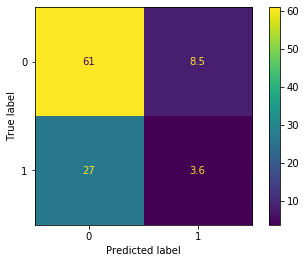

In [235]:
monotone_gb_cm = confusion_matrix(test_labels, monotone_predicted_df['predicted_label'].to_numpy(), 
                              labels=predicted_df['real_label'].unique())

percentage_cm = construct_precentage_cm (monotone_gb_cm, X_test)
disp = ConfusionMatrixDisplay(confusion_matrix=percentage_cm, display_labels=lr.classes_)
disp.plot()